### Sobel Transform + Canny Edge

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg

In [2]:
from early_analysis import *

Importing two images differing in convection size and boundary clarity

In [3]:
source_dir_1 = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/initial_convection_images"
source_dir_2 = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LCB6mil90deg0_frames"
os.chdir(source_dir_1)
unclear_frame = mpimg.imread('frame1.png')
os.chdir(source_dir_2)
clear_frame = mpimg.imread('frame1.png')

Working with second image

##### Step 1: Grayscale

In [4]:
clear_frame = clear_frame[...,1]

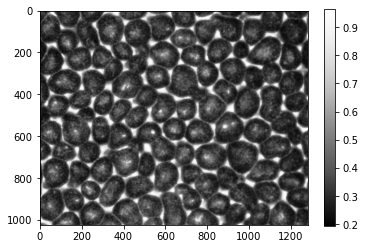

In [5]:
plt.imshow(clear_frame, cmap='Greys_r')
plt.colorbar();

##### Step 2: Slight Gaussian Blur to get rid of noise

In [6]:
clear_frame = cv2.GaussianBlur(clear_frame, (5,5), 0)

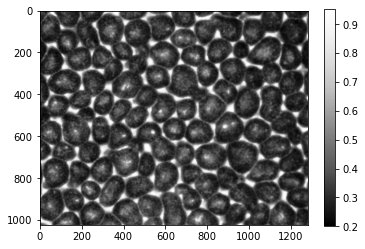

In [7]:
plt.imshow(clear_frame, cmap='Greys_r')
plt.colorbar();